In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire Data

In [2]:
# Acquire data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
# Which features are available on the dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# What features contain missing values?
train_df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

# Look statistics of numerical features

### "Survived" variable

In [9]:
survived_percentile = [.61, .62] # Survival rate is 38%

print("Survived:")
train_df["Survived"].describe(percentiles=survived_percentile)

Survived:


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

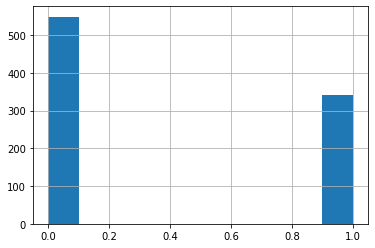

In [10]:
train_df["Survived"].hist()

Is a categorical feature, the values can be 0 or 1

Has a mean of 38%, which means that 38% of passengers survived


In [11]:
# Looking for class imbalance
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Is there class imbalance, the negative class has 549 rows and the positive one has 342 rows

### "Pclass" variable

In [12]:
pclass_percentiles = [.3, .4, .45]

print("Pclass:")
train_df["Pclass"].describe(percentiles=pclass_percentiles)

Pclass:


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
30%        2.000000
40%        2.000000
45%        3.000000
50%        3.000000
max        3.000000
Name: Pclass, dtype: float64

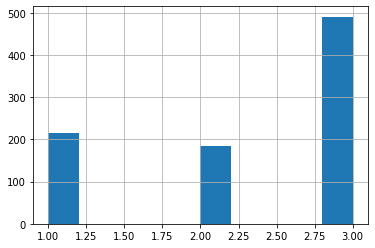

In [13]:
train_df["Pclass"].hist()

In [14]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
# Ticket class statistics from Survivors
train_df[train_df["Survived"] == 1]["Pclass"].describe(percentiles=pclass_percentiles)

count    342.000000
mean       1.950292
std        0.863321
min        1.000000
30%        1.000000
40%        2.000000
45%        2.000000
50%        2.000000
max        3.000000
Name: Pclass, dtype: float64

In [16]:
# Ticket class statistics from no Survivors
train_df[train_df["Survived"] == 0]["Pclass"].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

It does not show any significant information about survivors, less than 30% of survivors were from 1st class, 10% were from 2nd class and the 60% remaining were from 3rd class

Among no survivors, a 43% of 1st class passengers died, 44% from 2nd class and 75% from 3rd class. This shows that 3rd class passengers may have more probability of die

### "Age" variable

In [17]:
age_percentiles = [.05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .99]

print("Age:")
train_df["Age"].describe(percentiles=age_percentiles)

Age:


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

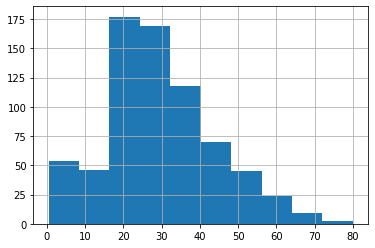

In [18]:
train_df["Age"].hist()

The distribution is a little bit skewed to the right due to a few large values, like the max value which is an age of 80 years.

The majority of the passengers are between 20 and 30 years old. There are some babies and some older people, only 1% of the passengers were older than 80 65 years.

In [19]:
# Age statistics from no survivors
train_df[train_df["Survived"] == 0]["Age"].describe(percentiles=age_percentiles)

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
5%         9.000000
10%       16.000000
20%       19.600000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       42.000000
90%       50.000000
99%       70.000000
max       74.000000
Name: Age, dtype: float64

In [20]:
# Age statistics from survivors
train_df[train_df["Survived"] == 1]["Age"].describe(percentiles=age_percentiles)

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
5%         2.450000
10%        5.000000
20%       17.000000
30%       21.700000
40%       24.000000
50%       28.000000
60%       31.400000
70%       35.000000
80%       40.000000
90%       49.000000
99%       62.110000
max       80.000000
Name: Age, dtype: float64

- Amongst the no survivors, the mean age of them is 30 years old, 10% of passengers dead were childs under 16 years old.
- Amongst the survivors, the mean age is 28 years old, a 20% were childs under 17 years.
- Comparing low percentiles on both cases, on survivors there are more childs because at least a 10% of passengers were under 5 years old. On no survivors the 5% were under 9. So more childs survived than died.

### "SibSp" variable

In [21]:
sibsp_percentile = [.68, .69]

print("SibSp:")
train_df["SibSp"].describe(percentiles=sibsp_percentile)

SibSp:


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
50%        0.000000
68%        0.000000
69%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
train_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Looking the statistics, it shows a great spread because of a great standard deviation compared to the mean, it indicates that almost all examples fall between 0 and 1 SibSp

Looking the values, 608 passengers, a 69'3% do not have siblings or spouses, only 283 passengers had it, which is a 31'7%

### "Parch" variable

In [23]:
parch_percentile = [.75, .77,.8]

print("Parch:")
train_df["Parch"].describe(percentiles=parch_percentile)

Parch:


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
77%        1.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64

In [24]:
train_df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

77% of passengers had neither parents or childs

### "Fare" variable

In [25]:
fare_percentile = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]

print("Fare:")
train_df["Fare"].describe(percentiles=fare_percentile)

Fare:


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

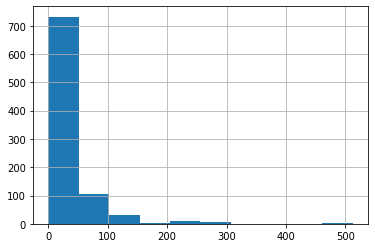

In [26]:
train_df["Fare"].hist()

- 80% of prices are under 39 dolars, being the 40% of them under 10 dolars
- Only 10% of passengers paied more than 77%, until a max amount of 512 dolars

In [27]:
train_df[train_df["Survived"] == 1]["Fare"].describe(percentiles=fare_percentile)

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
10%        7.799140
20%       10.500000
30%       13.000000
40%       18.975820
50%       26.000000
60%       30.000000
70%       52.554200
80%       77.712480
90%      110.883300
99%      263.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
train_df[train_df["Survived"] == 0]["Fare"].describe(percentiles=fare_percentile)

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
10%        7.229200
20%        7.750000
30%        7.895800
40%        8.050000
50%       10.500000
60%       14.443360
70%       21.075000
80%       27.900000
90%       46.900000
99%      183.642000
max      263.000000
Name: Fare, dtype: float64

- Comparing both percentiles, on the survived ones only a 20% paied less than 10 dolar, whereas amongst the no survivors, a 50% paied less than 10 dolars. May exist a relation between the deaths and the tickets price.

# Look statistics of categorical variables

In [29]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pickard, Mr. Berk (Berk Trembisky)",male,1601,B96 B98,S
freq,1,577,7,4,644


### "Sex" variable

In [30]:
train_df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [31]:
# Look sex on no survivors
train_df[train_df["Survived"] == 0]["Sex"].describe()

count      549
unique       2
top       male
freq       468
Name: Sex, dtype: object

In [32]:
# Look sex on survivors
train_df[train_df["Survived"] == 1]["Sex"].describe()

count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

- 64.75% of passengers were men
- If we look on no survivors, 85% of them were males, if we compare it to the total number of males, it results that 81.1% of total males died
- If we look on survivors, females were the most frequency with a 68.12%, if we compare it to the total number of females, it results that 74.2% of total females survived

### "Ticket" variable

In [33]:
train_df["Ticket"].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

- It has 210 duplicates, a 23'56%
- The most frequent ticket, is duplicated 7 times

### "Cabin" variable
It has the 77.1% of its cells with missing values, so this feature will be dropped

### "Embarked" variable

In [34]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# Embarkations from survivors
train_df[train_df["Survived"] == 1]["Embarked"].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [37]:
# Embarkations from no survivors
train_df[train_df["Survived"] == 0]["Embarked"].value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

- 72.44% of passengers embarkated on Southampton, of these passengers, a 66.3% died
- 18.89% of passengers embarkated on Cherbourg
- 8.66% of passengers embarkated on Queenstown

In [38]:
train_df["Name"].value_counts()

Pickard, Mr. Berk (Berk Trembisky)                         1
Navratil, Master. Edmond Roger                             1
Johnson, Mr. Alfred                                        1
Moran, Mr. Daniel J                                        1
Fahlstrom, Mr. Arne Jonas                                  1
Mullens, Miss. Katherine "Katie"                           1
Guggenheim, Mr. Benjamin                                   1
Lindqvist, Mr. Eino William                                1
Murdlin, Mr. Joseph                                        1
Sage, Miss. Dorothy Edith "Dolly"                          1
Bowerman, Miss. Elsie Edith                                1
Moran, Miss. Bertha                                        1
Crease, Mr. Ernest James                                   1
Nilsson, Miss. Helmina Josefina                            1
Kilgannon, Mr. Thomas J                                    1
Ford, Miss. Doolina Margaret "Daisy"                       1
Bourke, Mrs. John (Cathe

# Assumptions and relations between features
Variables with missing values are not analysed. Due to we will look how is their relationship with Survived, it makes sense to analyse the categorical variables

In [50]:
# Percentage of survivors for each class
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- As commented before, 1st class passengers are more likely to survive
- Passengers of 3rd class are more likely to die

In [51]:
# Percentage of survivors for each sex
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- Confirms the assumption that females are more likely to survive, a 74% of them survived

In [52]:
# Percentage of survivors depending the SibSp relationship
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [54]:
# Percentage of survivors depending the Parch relationship
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


We couldn't made assumptions based only in SibSp and Parch data:
- Persons with Parch of 3 are more likely to survive but no has further explanations

In [39]:
# Relation between Pclass and Survived
train_df[['Pclass', 'Survived']].groupby(["Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
# Relation between Sex and Survived
train_df[['Sex', 'Survived']].groupby(["Sex"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
# Relation between SibSp and Survived
train_df[['SibSp', 'Survived']].groupby(["SibSp"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [42]:
# Relation between Parch and Survived
train_df[['Parch', 'Survived']].groupby(["Parch"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


All of them are assumptions commented before
- 1st class passengers are more likely to survive, may create a new feature
- 74% of females survived
- SibSP and Parch don't show any significant information

# Visualize Data

### Correlating numerical features

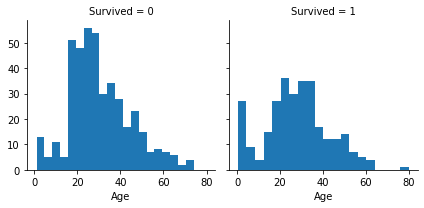

In [43]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- Infants (Age <= 4) had high survival rate
- Oldest passengers ( Age == 80) survived
- Large number of passengers between 16 an 28 years died

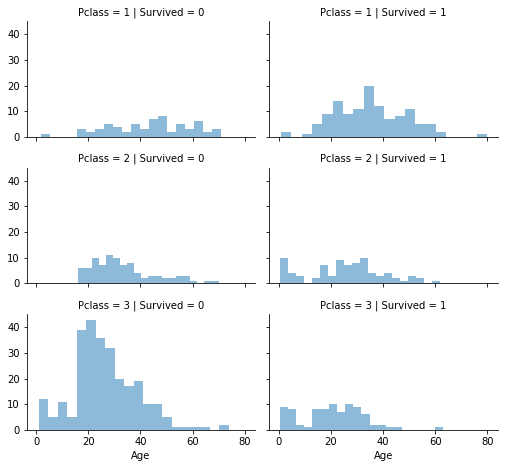

In [46]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

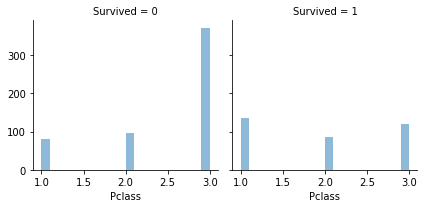

In [45]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Pclass', alpha=.5, bins=20)

- 3rd class has most passengers but most of them died
- Infants in 1st and 2nd classes mostly survived
- Most passengers of 1st class survived